In [40]:
import pandas as pd
from pathlib import Path
import numpy as np
import hvplot.pandas

In [6]:
# reading bank index csv file
banks_index = Path("BNKS.L_Price.csv")
banks_index = pd.read_csv(banks_index, index_col='Date', parse_dates=True)
banks_index

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,3.87050,3.90500,3.86950,3.93400,3.93400,76442
2019-01-03,3.89600,3.92000,3.89600,3.94250,3.94250,39994
2019-01-04,4.01425,4.01425,4.01425,4.01425,4.01425,0
2019-01-07,4.06450,4.06450,4.06450,4.06450,4.06450,0
2019-01-08,4.03375,4.03375,4.03375,4.03375,4.03375,0
...,...,...,...,...,...,...
2023-12-21,4.91650,4.95150,4.90700,4.92450,4.92450,824980
2023-12-22,4.90000,4.93950,4.90000,4.94075,4.94075,3946
2023-12-27,5.01700,5.02900,4.98100,5.00400,5.00400,399450


In [7]:
# reading WPC stock prices
WPC_stock_price = Path("./Resources/WFC Stock Data.csv")
WPC_stock_price = pd.read_csv(WPC_stock_price, index_col='Date', parse_dates=True)
WPC_stock_price

,WFC Close Price
Date,
2013-01-02 16:00:00,35.05
2013-01-03 16:00:00,34.76
2013-01-04 16:00:00,34.94
2013-01-07 16:00:00,34.77
2013-01-08 16:00:00,34.71
...,...
2023-12-22 16:00:00,49.18
2023-12-26 16:00:00,49.64
2023-12-27 16:00:00,49.33


In [8]:
# reading JPM stock prices
JPM_stock_price = Path("./Resources/JPM Stock Data.csv")
JPM_stock_price = pd.read_csv(JPM_stock_price, index_col='Date', parse_dates=True)
JPM_stock_price

,JPM Close Price
Date,
2013-01-02 16:00:00,44.66
2013-01-03 16:00:00,44.57
2013-01-04 16:00:00,45.36
2013-01-07 16:00:00,45.41
2013-01-08 16:00:00,45.50
...,...
2023-12-22 16:00:00,167.40
2023-12-26 16:00:00,168.39
2023-12-27 16:00:00,169.40


In [9]:
# reading BAC stock prices
BAC_stock_price = Path("./Resources/BAC Stock Data.csv")
BAC_stock_price = pd.read_csv(BAC_stock_price, index_col='Date', parse_dates=True)
BAC_stock_price

,BAC Close Price
Date,
2013-01-02 16:00:00,12.03
2013-01-03 16:00:00,11.96
2013-01-04 16:00:00,12.11
2013-01-07 16:00:00,12.09
2013-01-08 16:00:00,11.98
...,...
2023-12-22 16:00:00,33.43
2023-12-26 16:00:00,33.86
2023-12-27 16:00:00,33.84


In [10]:
# joining WPC, JPM, BAC stock prices into a single dataframe
bank_stock_prices_df = pd.concat([WPC_stock_price, JPM_stock_price, BAC_stock_price], axis='columns', join='inner')
bank_stock_prices_df.head()

,WFC Close Price,JPM Close Price,BAC Close Price
Date,,,
2013-01-02 16:00:00,35.05,44.66,12.03
2013-01-03 16:00:00,34.76,44.57,11.96
2013-01-04 16:00:00,34.94,45.36,12.11
2013-01-07 16:00:00,34.77,45.41,12.09
2013-01-08 16:00:00,34.71,45.50,11.98


In [11]:
# adjusting index to include data only (without timestamp)
bank_stock_prices_df.index = pd.to_datetime(bank_stock_prices_df.index.date) 
bank_stock_prices_df = bank_stock_prices_df.sort_index()
bank_stock_prices_df.head()

,WFC Close Price,JPM Close Price,BAC Close Price
2013-01-02,35.05,44.66,12.03
2013-01-03,34.76,44.57,11.96
2013-01-04,34.94,45.36,12.11
2013-01-07,34.77,45.41,12.09
2013-01-08,34.71,45.50,11.98


In [12]:
# joining stock prices with bank index into single dataframe
all_bank_stock_prices_df = pd.concat([banks_index['Close'], bank_stock_prices_df], axis='columns', join='inner')
all_bank_stock_prices_df.head()

,Close,WFC Close Price,JPM Close Price,BAC Close Price
2019-01-02,3.93400,46.94,99.31,24.96
2019-01-03,3.94250,46.57,97.11,24.56
2019-01-04,4.01425,47.95,100.69,25.58
2019-01-07,4.06450,47.64,100.76,25.56
2019-01-08,4.03375,47.54,100.57,25.51


In [13]:
# renaming column 'Close' to 'Bank Index'
all_bank_stock_prices_df.rename(columns={'Close': 'Bank Index'}, inplace=True)
all_bank_stock_prices_df.head() 

,Bank Index,WFC Close Price,JPM Close Price,BAC Close Price
2019-01-02,3.93400,46.94,99.31,24.96
2019-01-03,3.94250,46.57,97.11,24.56
2019-01-04,4.01425,47.95,100.69,25.58
2019-01-07,4.06450,47.64,100.76,25.56
2019-01-08,4.03375,47.54,100.57,25.51


In [14]:
# exporting dataframe to csv file
all_bank_stock_prices_df.to_csv('Stock_Price_Data.csv', index=True, index_label= 'Date')

In [103]:
all_bank_stock_prices_df.describe()

,Bank Index,WFC Close Price,JPM Close Price,BAC Close Price
count,1232.000000,1232.000000,1232.000000,1232.000000
mean,4.880789,42.288994,129.530203,32.678352
std,0.989915,8.532201,22.029214,6.519044
min,2.531000,21.140000,79.030000,18.080000
25%,4.146375,39.452500,111.225000,28.217500
50%,4.821625,44.675000,131.460000,31.330000
75%,5.664625,47.962500,147.932500,36.572500
max,7.168000,59.060000,171.780000,49.380000


In [51]:
# calculating daily returns

daily_returns = all_bank_stock_prices_df.pct_change()
daily_returns

,Bank Index,WFC Close Price,JPM Close Price,BAC Close Price
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,0.002161,-0.007882,-0.022153,-0.016026
2019-01-04,0.018199,0.029633,0.036865,0.041531
2019-01-07,0.012518,-0.006465,0.000695,-0.000782
2019-01-08,-0.007565,-0.002099,-0.001886,-0.001956
...,...,...,...,...
2023-12-21,-0.015789,0.002229,0.005704,0.006671
2023-12-22,0.003300,-0.005460,-0.000597,0.006928
2023-12-27,0.012802,0.003050,0.011947,0.012264
2023-12-28,0.001799,0.003041,0.005313,0.001182


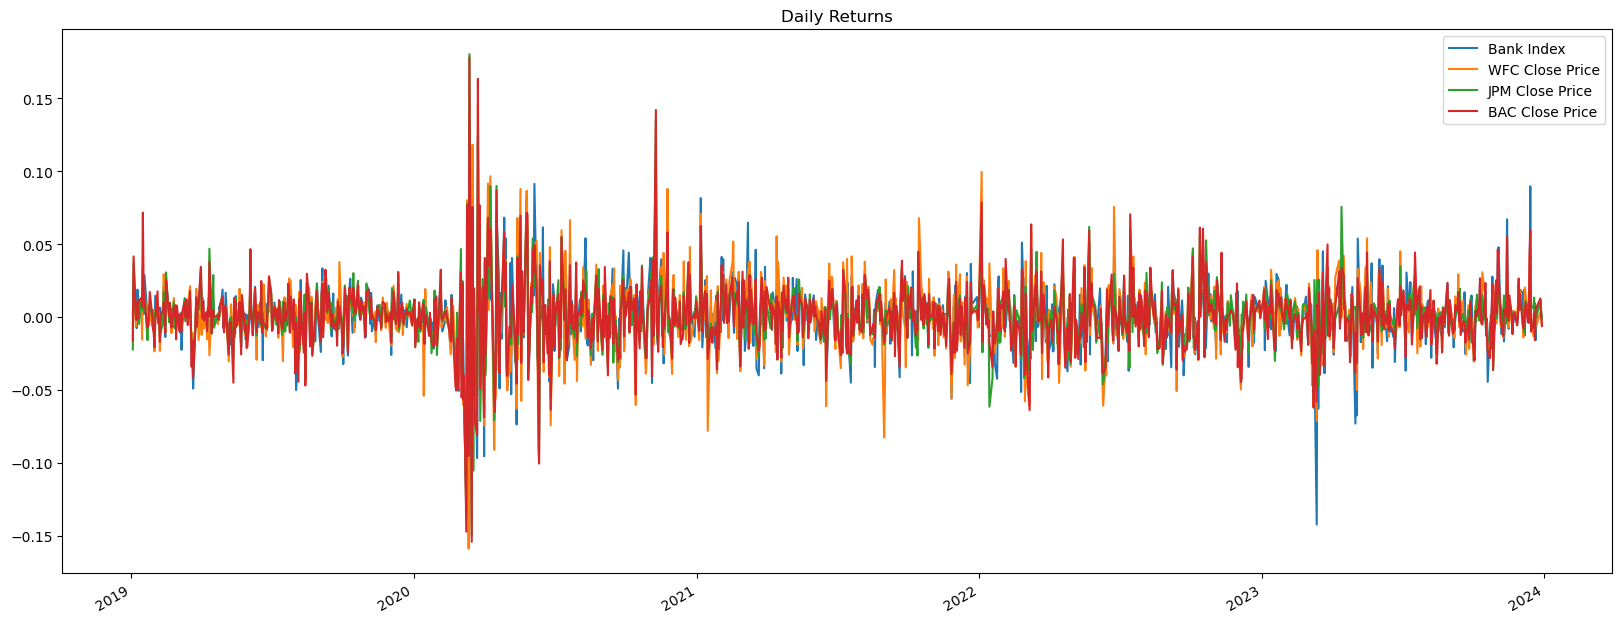

In [59]:
# plot daily returns

daily_returns.plot(figsize=(20,8), title = 'Daily Returns');

In [22]:
# calculate cumulative returns

cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns

,Bank Index,WFC Close Price,JPM Close Price,BAC Close Price
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,1.002161,0.992118,0.977847,0.983974
2019-01-04,1.020399,1.021517,1.013896,1.024840
2019-01-07,1.033172,1.014913,1.014601,1.024038
2019-01-08,1.025356,1.012782,1.012688,1.022035
...,...,...,...,...
2023-12-21,1.251779,1.053473,1.686638,1.330128
2023-12-22,1.255910,1.047720,1.685631,1.339343
2023-12-27,1.271988,1.050916,1.705770,1.355769
2023-12-28,1.274276,1.054112,1.714832,1.357372


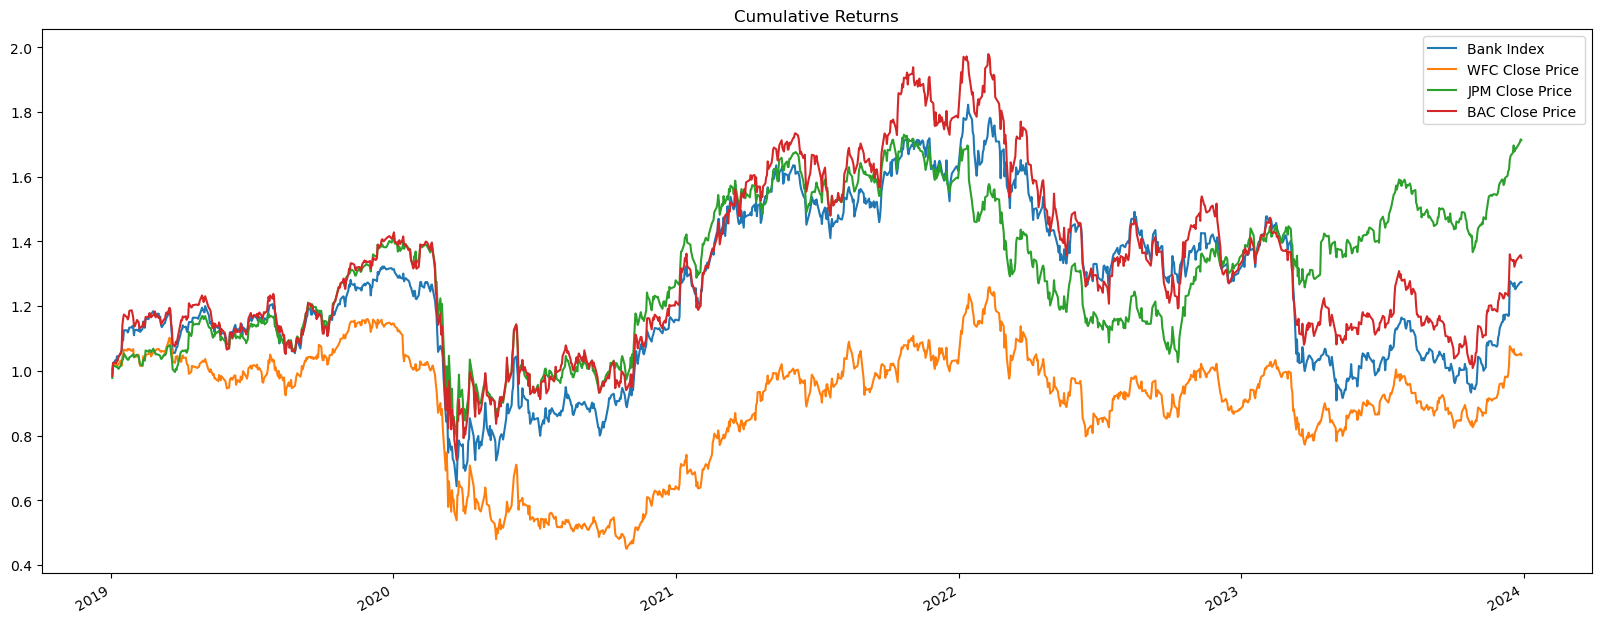

In [23]:
# Plot cumulative returns

cumulative_returns.plot(figsize=(20,8),title='Cumulative Returns');

In [25]:
# calculating daily standard deviations

daily_std = daily_returns.std()
daily_std

Bank Index         0.021760
WFC Close Price    0.024371
JPM Close Price    0.020408
BAC Close Price    0.022858
dtype: float64

In [28]:
# calculating annualized standard deviation

annualized_std = daily_std * np.sqrt(252)
annualized_std

Bank Index         0.345422
WFC Close Price    0.386879
JPM Close Price    0.323974
BAC Close Price    0.362860
dtype: float64

In [ ]:
### include analysis here 

In [31]:
# calculate rolling standard deviation 

rolling_std = daily_returns.rolling(window=21).std()
rolling_std.tail()

,Bank Index,WFC Close Price,JPM Close Price,BAC Close Price
2023-12-21,0.021624,0.015893,0.006936,0.017789
2023-12-22,0.021509,0.016124,0.007008,0.017727
2023-12-27,0.021493,0.016126,0.007171,0.017770
2023-12-28,0.021343,0.016117,0.006990,0.017599
2023-12-29,0.021396,0.016325,0.007099,0.017747


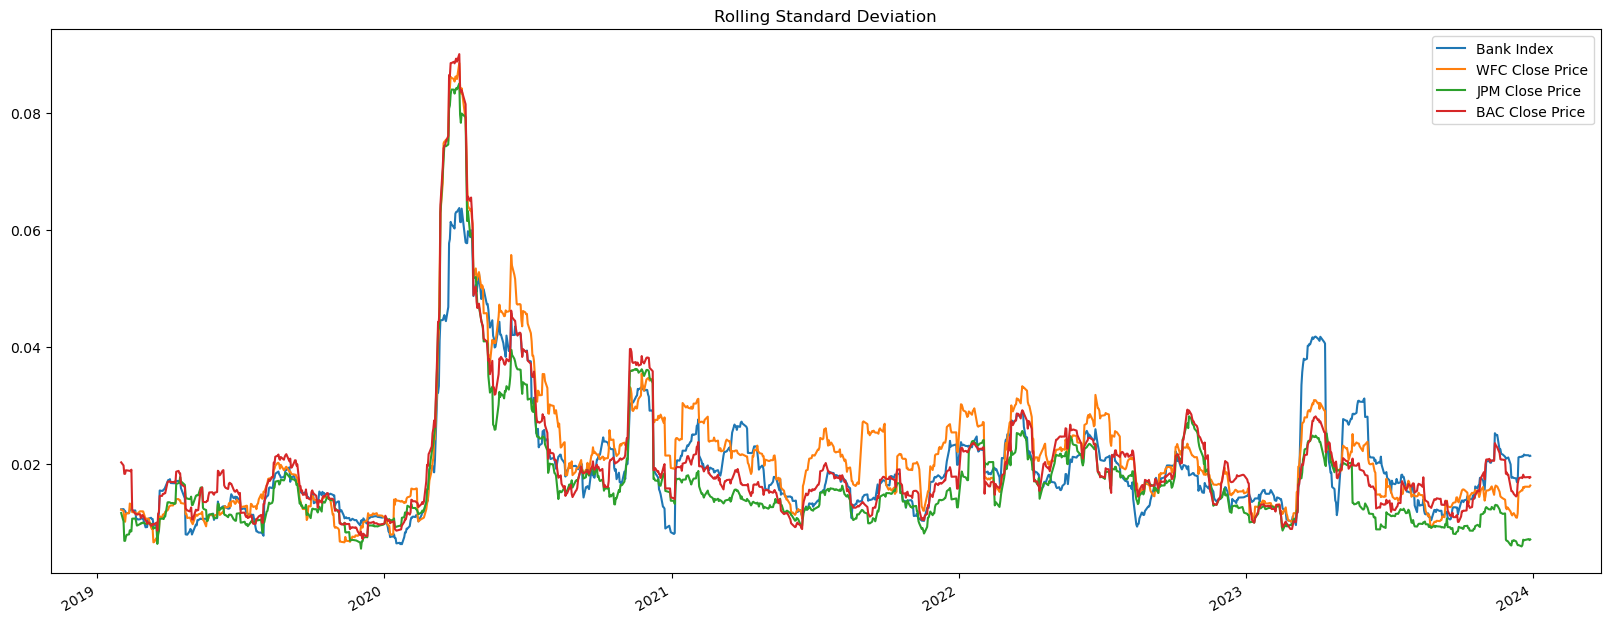

In [32]:
# plot rolling standard deviation

rolling_std.plot(figsize=(20,8),title='Rolling Standard Deviation');

In [34]:
# calculating correlation
daily_returns.corr()

,Bank Index,WFC Close Price,JPM Close Price,BAC Close Price
Bank Index,1.000000,0.701673,0.691562,0.743617
WFC Close Price,0.701673,1.000000,0.822014,0.860825
JPM Close Price,0.691562,0.822014,1.000000,0.904862
BAC Close Price,0.743617,0.860825,0.904862,1.000000


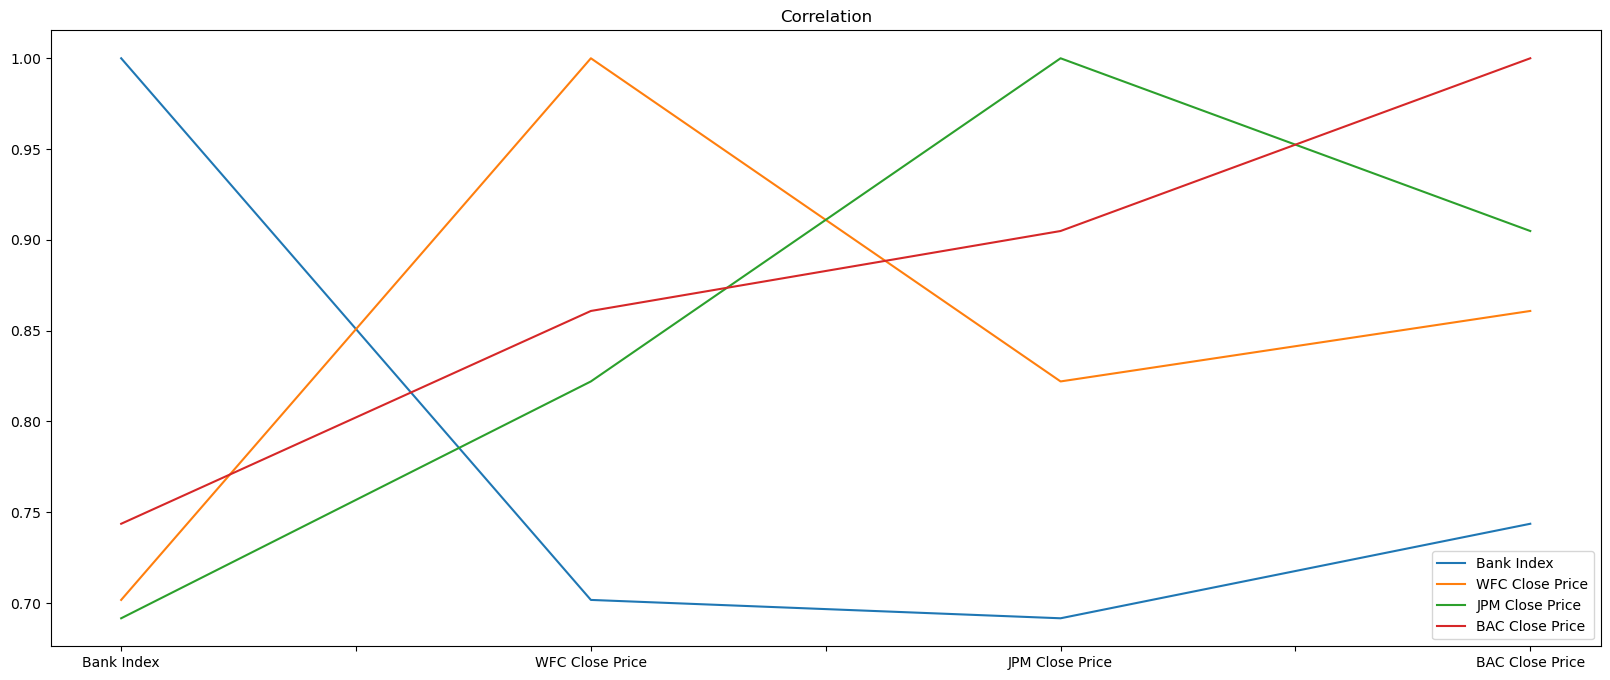

In [104]:
# plot correlation
daily_returns.corr().plot(figsize=(20,8), title = 'Correlation');

In [99]:
### include analysis here - WFC, JPM, BAC seem to be positively correlated

In [39]:
# calculate variance of S&P TSX

index_variance = daily_returns['Bank Index'].rolling(window=100).var()
index_variance

2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2023-12-21    0.000326
2023-12-22    0.000323
2023-12-27    0.000323
2023-12-28    0.000323
2023-12-29    0.000322
Name: Bank Index, Length: 1232, dtype: float64

In [ ]:
# calculate BAC covariance

BAC_covariance = daily_returns['BAC Close Price'].rolling(window=100).cov(daily_returns['Bank Index'])
BAC_covariance

In [71]:
# calculate JPM covariance

JPM_covariance = daily_returns['JPM Close Price'].rolling(window=100).cov(daily_returns['Bank Index'])
JPM_covariance

2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2023-12-21    0.000082
2023-12-22    0.000081
2023-12-27    0.000081
2023-12-28    0.000081
2023-12-29    0.000081
Length: 1232, dtype: float64

In [72]:
# calculate WFC covariance

WFC_covariance = daily_returns['WFC Close Price'].rolling(window=100).cov(daily_returns['Bank Index'])
WFC_covariance

2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2023-12-21    0.000179
2023-12-22    0.000177
2023-12-27    0.000176
2023-12-28    0.000176
2023-12-29    0.000177
Length: 1232, dtype: float64

In [90]:
# compute beta for BAC

BAC_beta = BAC_covariance / index_variance
BAC_beta

2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2023-12-21    0.719596
2023-12-22    0.720913
2023-12-27    0.719883
2023-12-28    0.719823
2023-12-29    0.723855
Length: 1232, dtype: float64

In [75]:
# compute beta for JPM

JPM_beta = JPM_covariance / index_variance
JPM_beta

2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2023-12-21    0.251794
2023-12-22    0.251257
2023-12-27    0.251738
2023-12-28    0.250997
2023-12-29    0.252863
Length: 1232, dtype: float64

In [98]:
# compute beta for WFC

WFC_beta = WFC_covariance / index_variance
WFC_beta

2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2023-12-21    0.548379
2023-12-22    0.547950
2023-12-27    0.543984
2023-12-28    0.545131
2023-12-29    0.549620
Length: 1232, dtype: float64

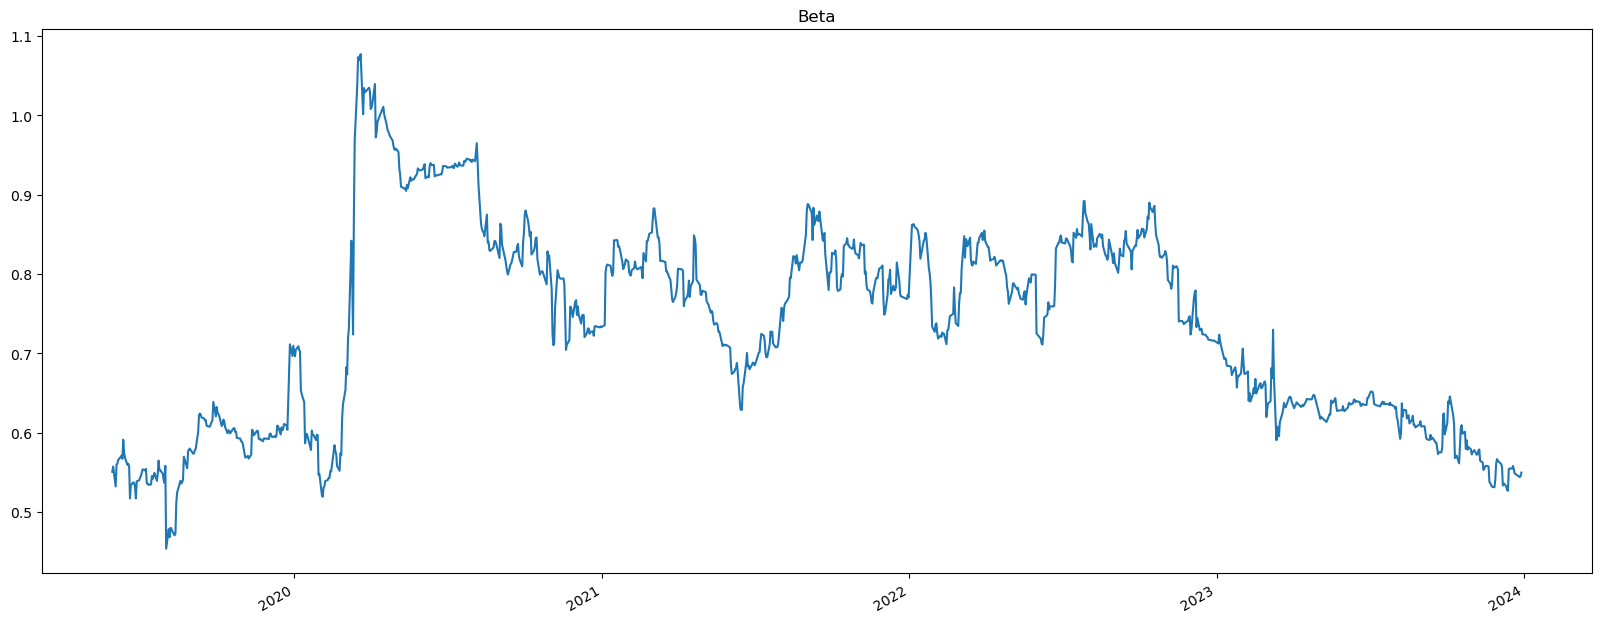

In [87]:
WFC_beta.plot(figsize=(20,8), title = 'Beta');

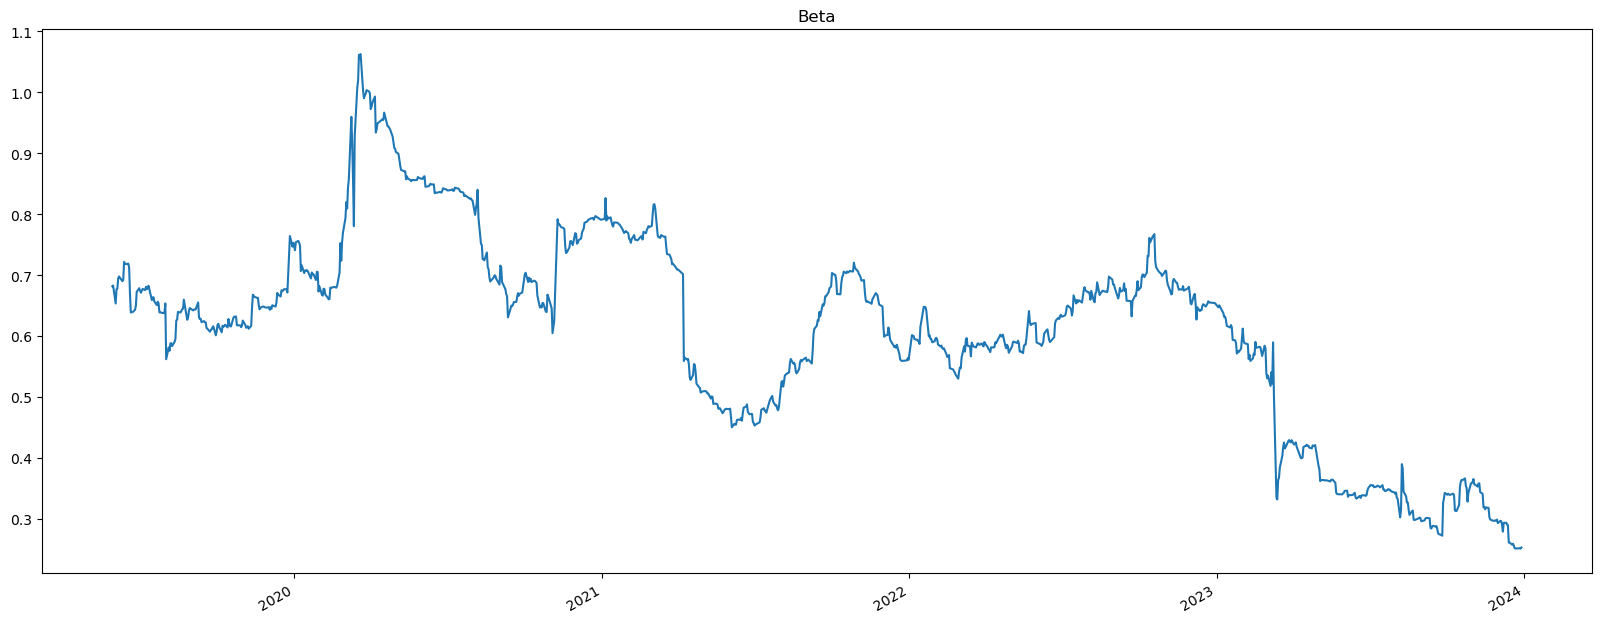

In [88]:
JPM_beta.plot(figsize=(20,8), title = 'Beta');

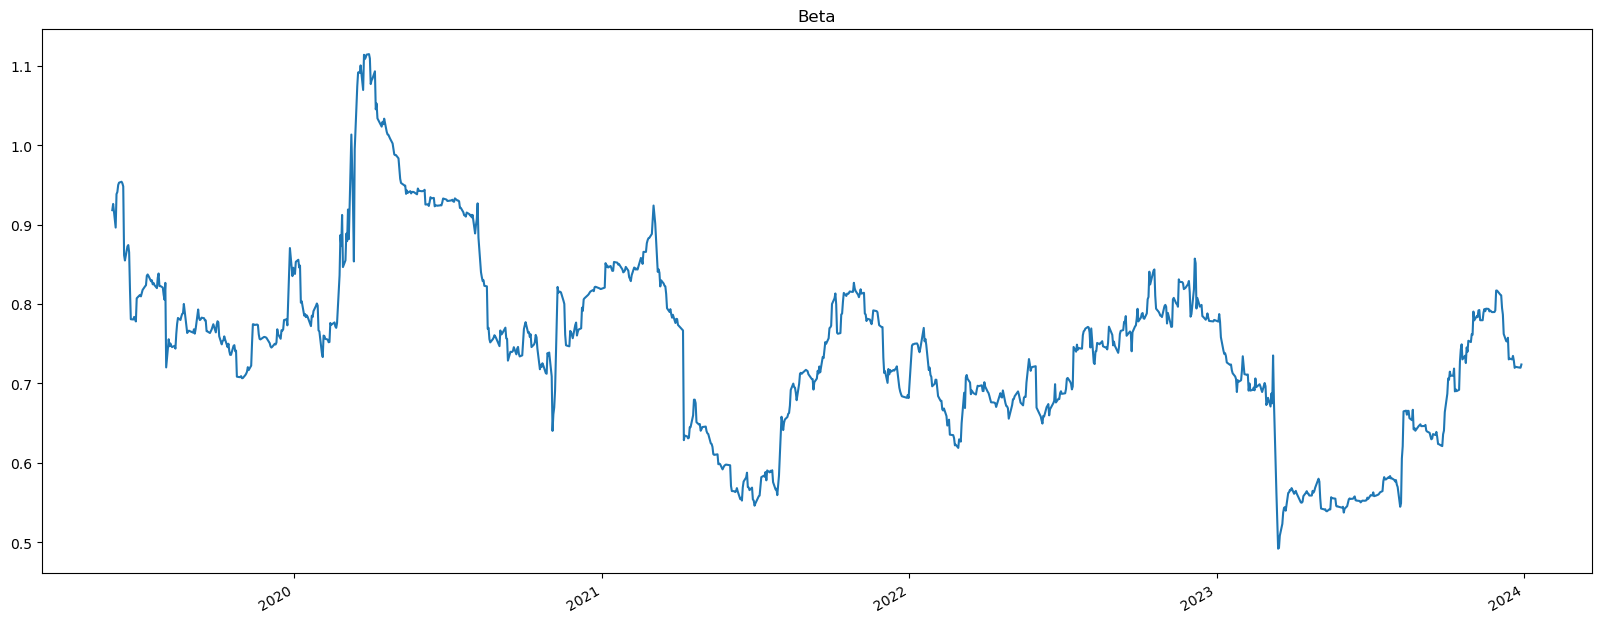

In [91]:
BAC_beta.plot(figsize=(20,8), title = 'Beta');

In [45]:
# calculating sharpe ratio

sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

Bank Index         0.317157
WFC Close Price    0.218810
JPM Close Price    0.501509
BAC Close Price    0.349424
dtype: float64

In [70]:
# Visualize sharpe ratios 

sharpe_ratios.hvplot.bar(title="Sharpe Ratios")

:Bars   [index]   (0)

In [ ]:
### include analysis here - JPM seems to be performing best (higher sharpe ratio = more attractive risk reward trade off- greater return at lower risk)

In [100]:
### compare with economic data sets